# UMA GTFS EDA

## Import Libraries

In [1]:
# analysis
import numpy as np
import pandas as pd
import json
import geopandas as gpd
import gtfs_functions
import gtfs_kit

# other
import warnings
import os
import requests

# visualisation libraries
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns

# Notebook styling
%matplotlib inline
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
warnings.filterwarnings("ignore")


# Assess Data Files

The data to be explored will be a selection of standard files in [gtfs](https://developers.google.com/transit/gtfs/reference/#dataset_files)


* City
    * GTFS/GTFS_<num'>
        * agency.txt
            * Description: Agency for the specified route. This field is required when the dataset provides data for routes from more than one agency in agency.txt, otherwise it is optional
        * stops.txt
            * Description: Stops where vehicles pick up or drop off riders. Also defines stations and station entrances.
        * routes.txt
            * Description: Transit routes. A route is a group of trips that are displayed to riders as a single service.
        * shapes.txt
            * Description: Rules for mapping vehicle travel paths, sometimes referred to as route alignments
        * <file_name'>.shp - alternative to shape.txt



In [2]:
root_gtfs_dir = os.path.join('..', '..', '..', 'resources', 'data',
                             'external', 'GTFS', 'latam_gtfs_v002')

cities = ['bogota', 'buenos_aires', 'mexico_city',
          'porto_alegre', 'santiago_deChile', 'sao_paulo']

files_required = ['agency.txt', 'stops.txt', 'routes.txt', 'shapes.txt']


# confirm that all required files there
print('confirm directories for city folders\n\n')
for place in [''] + cities:
    path = os.path.join(root_gtfs_dir, place)
    print(os.path.exists(path))
    

print('check contents of cities\n\n')
for place in cities:
    
    print(place)
    gtfs_basedir = os.path.join(root_gtfs_dir, place)
    print(gtfs_basedir)
    print(f"directories in {place}: {os.listdir(gtfs_basedir)}")
    
    for root, _, gtfs_files in os.walk(gtfs_basedir):
        
        print(f"root: {os.path.split(root)[1]}")
        root_name = os.path.split(root)[1]
        
        # print(f"subdirectories: {subdirectories}")
        print(f"files in {root_name}: {gtfs_files}")
        
        for required_file in files_required:
            
            print(f"is {required_file} in gtfs_files?")
            print(required_file in gtfs_files, '\n')
    
    
    print('\n\n')


confirm directories for city folders


True
True
True
True
True
True
True
check contents of cities


bogota
../../../resources/data/external/GTFS/latam_gtfs_v002/bogota
directories in bogota: ['GTFS', 'GTFS_2', 'GTFS_rename']
root: bogota
files in bogota: []
is agency.txt in gtfs_files?
False 

is stops.txt in gtfs_files?
False 

is routes.txt in gtfs_files?
False 

is shapes.txt in gtfs_files?
False 

root: GTFS
files in GTFS: ['shapes.txt', 'stops.txt', 'routes.txt', 'calendar.txt', 'feed_info.txt', 'stop_times.txt', 'agency.txt', 'trips.txt', 'calendar_dates.txt']
is agency.txt in gtfs_files?
True 

is stops.txt in gtfs_files?
True 

is routes.txt in gtfs_files?
True 

is shapes.txt in gtfs_files?
True 

root: GTFS_2
files in GTFS_2: ['shapes.txt', 'stops.txt', 'routes.txt', 'calendar.txt', 'feed_info.txt', 'stop_times.txt', 'agency.txt', 'trips.txt', 'calendar_dates.txt']
is agency.txt in gtfs_files?
True 

is stops.txt in gtfs_files?
True 

is routes.txt in gtfs_files?
True 

is s

# Import Datasets

In [3]:
from re import sub

gtfs_data = {}

for place in cities:
    
    print(place)
    gtfs_dir = os.path.join(root_gtfs_dir, place, 'GTFS')
    
    gtfs_data[place] = {sub('.txt', "", file):
                        pd.read_csv(os.path.join(gtfs_dir, file))
                        for basepath in os.listdir(gtfs_dir)
                        for file in files_required}
    

bogota
buenos_aires
mexico_city
porto_alegre
santiago_deChile
sao_paulo


# Assess datasets

Check for cities

In [4]:
for key, val in gtfs_data.items():
    print(f"key:{key}")
    # print(f"value: {val}")
    print("\n\n")

key:bogota



key:buenos_aires



key:mexico_city



key:porto_alegre



key:santiago_deChile



key:sao_paulo





Check Columns in selected GTFS tables

In [5]:
for key_1, val_1 in gtfs_data.items():
    print(f"key:{key_1}")
    # print(f"value: {val_1}")
    
    for key_2, val_2 in val_1.items():
        
        print(f"{key_2} Table:\n{val_2.columns}")
        # print(f"{key_2} Table: ")
        
    print("\n\n")

key:bogota
agency Table:
Index(['agency_id', 'agency_name', 'agency_url', 'agency_timezone',
       'agency_lang', 'agency_phone', 'agency_fare_url'],
      dtype='object')
stops Table:
Index(['stop_id', 'stop_code', ' stop_name', 'stop_desc', 'stop_lat',
       'stop_lon', 'stop_url', 'wheelchair_boarding'],
      dtype='object')
routes Table:
Index(['route_id', 'agency_id', 'route_long_name', 'route_desc',
       'route_short_name', 'route_type', 'route_url', 'route_color',
       'route_text_color'],
      dtype='object')
shapes Table:
Index(['shape_id', 'shape_pt_lat', 'shape_pt_lon', 'shape_pt_sequence'], dtype='object')



key:buenos_aires
agency Table:
Index(['agency_id', 'agency_name', 'agency_url', 'agency_timezone',
       'agency_lang', 'agency_phone', 'agency_fare_url'],
      dtype='object')
stops Table:
Index(['stop_id', 'stop_code', 'stop_name', 'stop_desc', 'stop_lat',
       'stop_lon', 'zone_id', 'stop_url', 'location_type', 'parent_station',
       'stop_timezone', '

Look for common folders

In [6]:
# check common folders for each file type
for file in files_required:
    
    for city in gtfs_data.keys():
        
        print(f"{file} in {city}:")
        print(gtfs_data[city][file.replace('.txt','')].columns)
        
        print('\n')
        
        
    print("\n\n")

agency.txt in bogota:
Index(['agency_id', 'agency_name', 'agency_url', 'agency_timezone',
       'agency_lang', 'agency_phone', 'agency_fare_url'],
      dtype='object')


agency.txt in buenos_aires:
Index(['agency_id', 'agency_name', 'agency_url', 'agency_timezone',
       'agency_lang', 'agency_phone', 'agency_fare_url'],
      dtype='object')


agency.txt in mexico_city:
Index(['agency_id', 'agency_name', 'agency_url', 'agency_timezone',
       'agency_lang', 'agency_phone'],
      dtype='object')


agency.txt in porto_alegre:
Index(['agency_id', 'agency_name', 'agency_url', 'agency_timezone',
       'agency_lang', 'agency_phone', 'agency_fare_url'],
      dtype='object')


agency.txt in santiago_deChile:
Index(['agency_id', 'agency_name', 'agency_url', 'agency_timezone'], dtype='object')


agency.txt in sao_paulo:
Index(['agency_id', 'agency_name', 'agency_url', 'agency_timezone',
       'agency_lang'],
      dtype='object')





stops.txt in bogota:
Index(['stop_id', 'stop_code', 

# Extract common data fields from each table

Create object for common columns. This will be the first version of standard columns to use.

Analyis is required to determine if more columns are required.

name: `standard_columns`

In [7]:
city

'sao_paulo'

In [35]:

city = 'sao_paulo'

# create new standard object
gtfs_data['standard_columns'] = {}


# check common folders for each file type
for file in [file.replace('.txt','') for file in files_required]:
    print(file)
    print(gtfs_data[city].keys())
    print("=====")
    
#     # ensure that key is in 
#     if file in gtfs_data[city]:
        
#         print([gtfs_data[city][file].columns
#                for city in gtfs_data.keys()])
        
    file_cols_per_city = [list(gtfs_data[city][file].columns)
                          for city in cities]
    
    print(file_cols_per_city)
    print("=====")
#     print(table_cols)
#     print(set.intersection(*[set(list) for list in table_cols]))
    
    
    # create set of columns that are common to all files
    gtfs_data['standard_columns'][sub('.txt', "", file)] = list(set.intersection(*[set(list)
                                                                                   for list in file_cols_per_city]))
    
#     print(gtfs_data.keys())
    print(gtfs_data['standard_columns'])
    
    print("\n\n")

agency
dict_keys(['agency', 'stops', 'routes', 'shapes'])
=====
[['agency_id', 'agency_name', 'agency_url', 'agency_timezone', 'agency_lang', 'agency_phone', 'agency_fare_url'], ['agency_id', 'agency_name', 'agency_url', 'agency_timezone', 'agency_lang', 'agency_phone', 'agency_fare_url'], ['agency_id', 'agency_name', 'agency_url', 'agency_timezone', 'agency_lang', 'agency_phone'], ['agency_id', 'agency_name', 'agency_url', 'agency_timezone', 'agency_lang', 'agency_phone', 'agency_fare_url'], ['agency_id', 'agency_name', 'agency_url', 'agency_timezone'], ['agency_id', 'agency_name', 'agency_url', 'agency_timezone', 'agency_lang']]
=====
{'agency': ['agency_url', 'agency_id', 'agency_name', 'agency_timezone']}



stops
dict_keys(['agency', 'stops', 'routes', 'shapes'])
=====
[['stop_id', 'stop_code', ' stop_name', 'stop_desc', 'stop_lat', 'stop_lon', 'stop_url', 'wheelchair_boarding'], ['stop_id', 'stop_code', 'stop_name', 'stop_desc', 'stop_lat', 'stop_lon', 'zone_id', 'stop_url', 'loc

In [36]:
for file in [file.replace('.txt','') for file in files_required]:
    
    print(file)
#     print(gtfs_data['standard_columns'])
    standard_columns = gtfs_data['standard_columns'][file]
    print(standard_columns)
#     print(gtfs_data[city]['standard_columns'])
#     print("\n\n")

agency
['agency_url', 'agency_id', 'agency_name', 'agency_timezone']
stops
['stop_lat', 'stop_lon', 'stop_id']
routes
['route_type', 'agency_id', 'route_text_color', 'route_color', 'route_long_name', 'route_short_name', 'route_id']
shapes
['shape_id', 'shape_pt_lat', 'shape_pt_lon', 'shape_pt_sequence']


# Explore Common Data

In [34]:
for file in files_required:
    print(file)

agency.txt
stops.txt
routes.txt
shapes.txt


## Agency

In [37]:
file = 'agency'
for city in cities:
    print(city)
    columns = gtfs_data['standard_columns'][file]
    temp_df = gtfs_data[city][file][columns]
    print(temp_df.info())
    print("\n\n")

bogota
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   agency_url       6 non-null      object
 1   agency_id        6 non-null      int64 
 2   agency_name      6 non-null      object
 3   agency_timezone  6 non-null      object
dtypes: int64(1), object(3)
memory usage: 320.0+ bytes
None



buenos_aires
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   agency_url       192 non-null    object
 1   agency_id        192 non-null    int64 
 2   agency_name      192 non-null    object
 3   agency_timezone  192 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.1+ KB
None



mexico_city
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 # 

## Stops

In [38]:
file = 'stops'
for city in cities:
    print(city)
    columns = gtfs_data['standard_columns'][file]
    temp_df = gtfs_data[city][file][columns]
    print(temp_df.info())
    print("\n\n")

bogota
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12787 entries, 0 to 12786
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stop_lat  12787 non-null  float64
 1   stop_lon  12787 non-null  float64
 2   stop_id   12787 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 299.8 KB
None



buenos_aires
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42874 entries, 0 to 42873
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stop_lat  42874 non-null  float64
 1   stop_lon  42874 non-null  float64
 2   stop_id   42874 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 1005.0 KB
None



mexico_city
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7952 entries, 0 to 7951
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stop_lat  7952 non-null   float64
 1   stop_lon  795

## Routes

In [39]:
file = 'routes'
for city in cities:
    print(city)
    columns = gtfs_data['standard_columns'][file]
    temp_df = gtfs_data[city][file][columns]
    print(temp_df.info())
    print("\n\n")

bogota
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   route_type        558 non-null    int64  
 1   agency_id         558 non-null    int64  
 2   route_text_color  558 non-null    object 
 3   route_color       558 non-null    object 
 4   route_long_name   0 non-null      float64
 5   route_short_name  558 non-null    object 
 6   route_id          558 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 30.6+ KB
None



buenos_aires
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   route_type        1078 non-null   int64  
 1   agency_id         1078 non-null   int64  
 2   route_text_color  0 non-null      float64
 3   route_color       0 non-null      fl

## Shapes

In [40]:
file = 'shapes'
for city in cities:
    print(city)
    columns = gtfs_data['standard_columns'][file]
    temp_df = gtfs_data[city][file][columns]
    print(temp_df.info())
    print("\n\n")

bogota
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424215 entries, 0 to 424214
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   shape_id           424215 non-null  object 
 1   shape_pt_lat       424215 non-null  float64
 2   shape_pt_lon       424215 non-null  float64
 3   shape_pt_sequence  424215 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 12.9+ MB
None



buenos_aires
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720982 entries, 0 to 720981
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   shape_id           720982 non-null  int64  
 1   shape_pt_lat       720982 non-null  float64
 2   shape_pt_lon       720982 non-null  float64
 3   shape_pt_sequence  720982 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 22.0 MB
None



mexico_city
<class 'pandas.core.frame.Data

# Transit Stops Analysis

## Create Points

In [43]:
file = 'stops'
for city in cities:
    
    # 
    print(city)
    columns = gtfs_data['standard_columns'][file]
    temp_df = gtfs_data[city][file][columns]
    
    lon = temp_df['stop_lat']
    lat = temp_df['stop_lon']
    temp_gdf = gpd.GeoDataFrame(temp_df,
                                geometry=gpd.points_from_xy(lon, lat),
                                crs={'init' :'epsg:4326'})
    
    
    print(temp_gdf.info())
    print("\n\n")

bogota
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12787 entries, 0 to 12786
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   stop_lat  12787 non-null  float64 
 1   stop_lon  12787 non-null  float64 
 2   stop_id   12787 non-null  int64   
 3   geometry  12787 non-null  geometry
dtypes: float64(2), geometry(1), int64(1)
memory usage: 399.7 KB
None



buenos_aires
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 42874 entries, 0 to 42873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   stop_lat  42874 non-null  float64 
 1   stop_lon  42874 non-null  float64 
 2   stop_id   42874 non-null  int64   
 3   geometry  42874 non-null  geometry
dtypes: float64(2), geometry(1), int64(1)
memory usage: 1.3 MB
None



mexico_city
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7952 entries, 0 to 7951
Data columns (total 4 columns)

## Create Buffers Around Points

In [46]:
temp_gdf['buffer_100m'] = temp_gdf.buffer(100)
print(temp_gdf.info())
temp_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19810 entries, 0 to 19809
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   stop_lat     19810 non-null  float64 
 1   stop_lon     19810 non-null  float64 
 2   stop_id      19810 non-null  int64   
 3   geometry     19810 non-null  geometry
 4   buffer_100m  19810 non-null  geometry
dtypes: float64(2), geometry(2), int64(1)
memory usage: 774.0 KB
None


stop_lat   stop_lon  stop_id                     geometry  \
0 -23.554022 -46.671108    18848  POINT (-23.55402 -46.67111)   
1 -23.546498 -46.691141    18849  POINT (-23.54650 -46.69114)   
2 -23.558094 -46.660205    18850  POINT (-23.55809 -46.66020)   
3 -23.635039 -46.641239    18851  POINT (-23.63504 -46.64124)   
4 -23.645996 -46.641027    18852  POINT (-23.64600 -46.64103)   

                                         buffer_100m  
0  POLYGON ((76.446 -46.671, 75.964 -56.473, 74.5...  
1  POLYGON ((76.454 -46.691, 75.972 -56.493, 74.5...  
2  POLYGON ((76.442 -46.660, 75.960 -56.462, 74.5...  
3  POLYGON ((76.365 -46.641, 75.883 -56.443, 74.4...  
4  POLYGON ((76.354 -46.641, 75.872 -56.443, 74.4...

<AxesSubplot:>

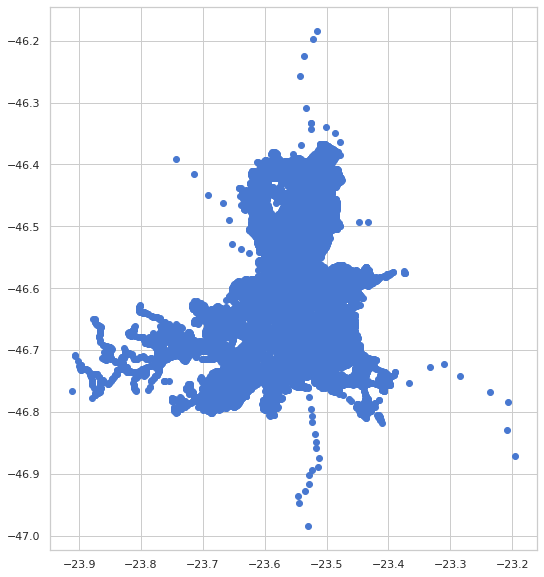

In [49]:
temp_gdf.plot()

# Transit Route Analyis

## Build Routes from shapes.txt

In [52]:
temp_df

shape_id  shape_pt_lat  shape_pt_lon  shape_pt_sequence
0       SP_1005      4.764772    -74.031607                  1
1       SP_1005      4.764791    -74.032257                  2
2       SP_1005      4.764863    -74.032491                  3
3       SP_1005      4.764947    -74.034159                  4
4       SP_1005      4.765113    -74.036557                  5
...         ...           ...           ...                ...
424210  SP_2291      4.608824    -74.163570                783
424211  SP_2291      4.609123    -74.163543                784
424212  SP_2291      4.609783    -74.163497                785
424213  SP_2291      4.609783    -74.163497                786
424214  SP_2291      4.609783    -74.163497                787

[424215 rows x 4 columns]

In [54]:
from shapely.geometry import LineString
file = 'shapes'
for city in cities:
    
    # 
    print(city)
    columns = gtfs_data['standard_columns'][file]
    temp_df = gtfs_data[city][file][columns]
    
    lon = temp_df['shape_pt_lat']
    lat = temp_df['shape_pt_lon']
    temp_gdf = gpd.GeoDataFrame(temp_df,
                                geometry=gpd.points_from_xy(lon, lat))
    
    line_gdf = temp_gdf.groupby(['shape_id'])['geometry'].apply(lambda x: LineString(x.tolist()))
    line_gdf = gpd.GeoDataFrame(line_gdf, geometry='geometry', )
                                                                
    
    
    print(temp_gdf.info())
    print(line_gdf.info())
    print("\n\n")

bogota
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 424215 entries, 0 to 424214
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   shape_id           424215 non-null  object  
 1   shape_pt_lat       424215 non-null  float64 
 2   shape_pt_lon       424215 non-null  float64 
 3   shape_pt_sequence  424215 non-null  int64   
 4   geometry           424215 non-null  geometry
dtypes: float64(2), geometry(1), int64(1), object(1)
memory usage: 16.2+ MB
None
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 663 entries, SP_1005 to SP_995
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  663 non-null    geometry
dtypes: geometry(1)
memory usage: 10.4+ KB
None



buenos_aires
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 720982 entries, 0 to 720981
Data columns (total 5 columns):
 #   Column             No

<AxesSubplot:>

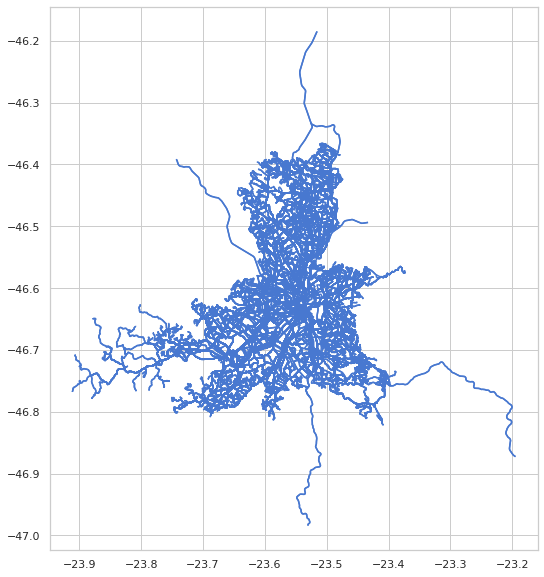

In [55]:
line_gdf.plot()

In [58]:
line_gdf['buffer_100m'] = line_gdf['geometry'].buffer(100)
print(line_gdf.info())
line_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1823 entries, 17838 to 72474
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   geometry     1823 non-null   geometry
 1   buffer_100m  1823 non-null   geometry
dtypes: geometry(2)
memory usage: 42.7 KB
None


geometry  \
shape_id                                                      
17838     LINESTRING (-23.64631 -46.64105, -23.64594 -46...   
17839     LINESTRING (-23.48005 -46.60321, -23.48023 -46...   
17840     LINESTRING (-23.58443 -46.58193, -23.58463 -46...   
17841     LINESTRING (-23.54650 -46.69114, -23.54678 -46...   
17842     LINESTRING (-23.52559 -46.66696, -23.52590 -46...   

                                                buffer_100m  
shape_id                                                     
17838     POLYGON ((-45.929 50.725, -45.955 50.839, -45....  
17839     POLYGON ((-45.553 50.807, -45.553 50.807, -45....  
17840     POLYGON ((-119.653 -73.912, -121.029 -69.152, ...  
17841     POLYGON ((-113.598 -90.174, -113.596 -90.173, ...  
17842     POLYGON ((-93.048 -118.546, -101.661 -109.076,...

In [61]:
print(line_gdf.crs)

TypeError: 'NoneType' object is not callable